In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats
import seaborn as sns

In [3]:
# find the path on your disk
pathName = r"C:\MyFiles\Dropbox\Teaching\Urban_Data_Analsysis\Fall 2020\Data\exam_scores.csv"

In [4]:
# read the csv as a dataframe
df = pd.read_csv(pathName)

In [5]:
df.sample(10)

,EthincityGroups,parental_level_of_education,test_preparation_course,math_score,reading_score,writing_score,study_hours
15,group D,master's degree,completed,85,79,79,7
80,group C,associate's degree,none,50,64,68,4
40,group D,associate's degree,completed,72,77,80,5
58,group B,some college,completed,67,71,71,1
75,group B,some college,none,54,70,68,2
61,group E,some college,none,66,64,65,5
37,group B,bachelor's degree,none,72,64,64,7
66,group E,high school,none,62,80,74,1
67,group B,high school,completed,61,74,56,3
13,group E,some college,none,86,77,70,5


### correlation matrix

In [20]:
df.corr()
# df.corr().round(2)

,math_score,reading_score,writing_score,study_hours
math_score,1.000000,0.857614,0.842227,0.661965
reading_score,0.857614,1.000000,0.957473,0.569435
writing_score,0.842227,0.957473,1.000000,0.578325
study_hours,0.661965,0.569435,0.578325,1.000000


### Correlation heatmap

<AxesSubplot:>

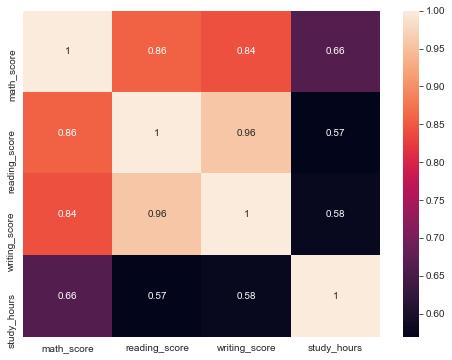

In [10]:
# set the style
sns.set_style("whitegrid")

# set the size
plt.figure(figsize=(8,6))

# plot
sns.heatmap(((df[['math_score','reading_score','writing_score','study_hours']]).corr()), annot=True)

### Calculate correlation coefficient

In [21]:
# stats.pearsonr(x, y)
stats.pearsonr(df['math_score'],df['study_hours'])
# the first output is the correlation value and the second outcome is the p-value

(0.6619650493998472, 6.435343932530891e-14)

In [26]:
# stats.pearsonr(x, y)
stats.pearsonr(df['reading_score'],df['study_hours'])
# the first output is the correlation value and the second outcome is the p-value

(0.5694347807949258, 6.316459765559139e-10)

### Scatter plot

In [22]:
df.columns

Index(['EthincityGroups', 'parental_level_of_education',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'study_hours'],
      dtype='object')

<AxesSubplot:xlabel='math_score', ylabel='study_hours'>

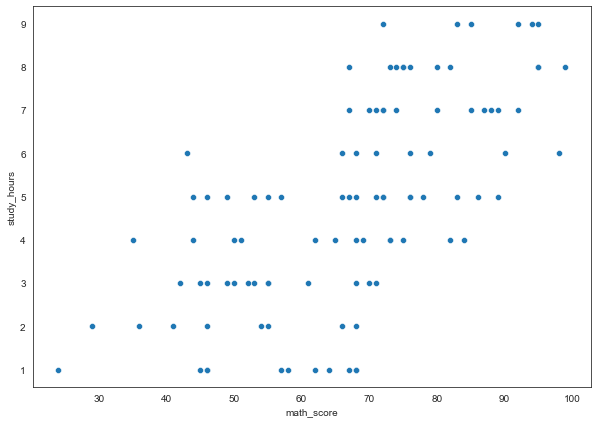

In [25]:
# set the style
sns.set_style("white")

# set the size
fig = plt.gcf()
# Changing Seaborn Plot size
fig.set_size_inches(10, 7)

# plot
sns.scatterplot(data=df, x='math_score', y="study_hours")

## Scatter plot with the best line

<AxesSubplot:xlabel='math_score', ylabel='study_hours'>

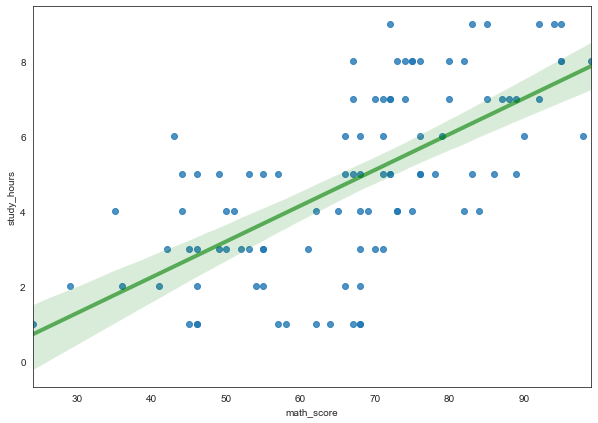

In [14]:
# set teh style
sns.set_style("white")

# seet the size
fig = plt.gcf()
# Changing Seaborn Plot size
fig.set_size_inches(10, 7)

# plot
sns.regplot(x=df['math_score'], y=df['study_hours'], line_kws={"color":"green","alpha":0.6,"lw":4})

### Scatter plot with histograms

<Figure size 1008x1008 with 0 Axes>

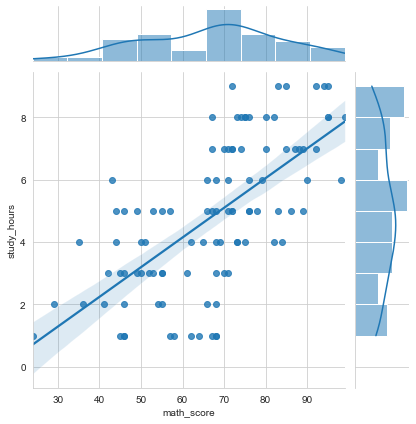

In [15]:
sns.set_style("whitegrid")

fig = plt.gcf()
# Changing Seaborn Plot size
fig.set_size_inches(14, 14)

sns.jointplot(data=df, x='math_score', y='study_hours', kind="reg")

# Regressions

### Univariate linear regression

In [6]:
independent_Var = df['study_hours']
dependent_var   = df['math_score']

independent_Var = sm.add_constant(independent_Var)

# Fit and summarize OLS model
linearModel = sm.OLS(dependent_var, independent_Var)
results = linearModel.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             math_score   R-squared:                       0.438
Model:                            OLS   Adj. R-squared:                  0.432
Method:                 Least Squares   F-statistic:                     76.44
Date:                Sun, 25 Oct 2020   Prob (F-statistic):           6.44e-14
Time:                        19:59:54   Log-Likelihood:                -393.11
No. Observations:                 100   AIC:                             790.2
Df Residuals:                      98   BIC:                             795.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          44.8916      2.825     15.890      

### Multivariate linear regression

In [8]:
independent_Var = df[['study_hours','reading_score']]
dependent_var = df['writing_score']
# add the constant value to the indpendet variables
independent_Var = sm.add_constant(independent_Var)

# Fit and summarize OLS model
linearModel = sm.OLS(dependent_var, independent_Var)
results = linearModel.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          writing_score   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     545.7
Date:                Sun, 25 Oct 2020   Prob (F-statistic):           1.67e-53
Time:                        21:01:00   Log-Likelihood:                -295.21
No. Observations:                 100   AIC:                             596.4
Df Residuals:                      97   BIC:                             604.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -4.4941      2.307     -1.948